## Import
---

In [1]:
# Standard Libs
from collections import Counter
import re

# 3rd Party Libs
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# DATA SET
N_ROWS_READ = None
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

# TEXT CLENAING
TEXT_CLEANING_RE_ALL = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"

## Data Set
---

In [4]:
dataset_path = 'missions/W2/M5/data/sentimental_analysis.csv'

print("Open file:", dataset_path)
df = pd.read_csv(dataset_path, encoding=DATASET_ENCODING , names=DATASET_COLUMNS, nrows=N_ROWS_READ)

Open file: missions/W2/M5/data/sentimental_analysis.csv


In [5]:
df.shape

(1600000, 6)

In [6]:
df.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [7]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [8]:
%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))

CPU times: user 197 ms, sys: 6 ms, total: 203 ms
Wall time: 202 ms


Text(0.5, 1.0, 'Dataset labels distribuition')

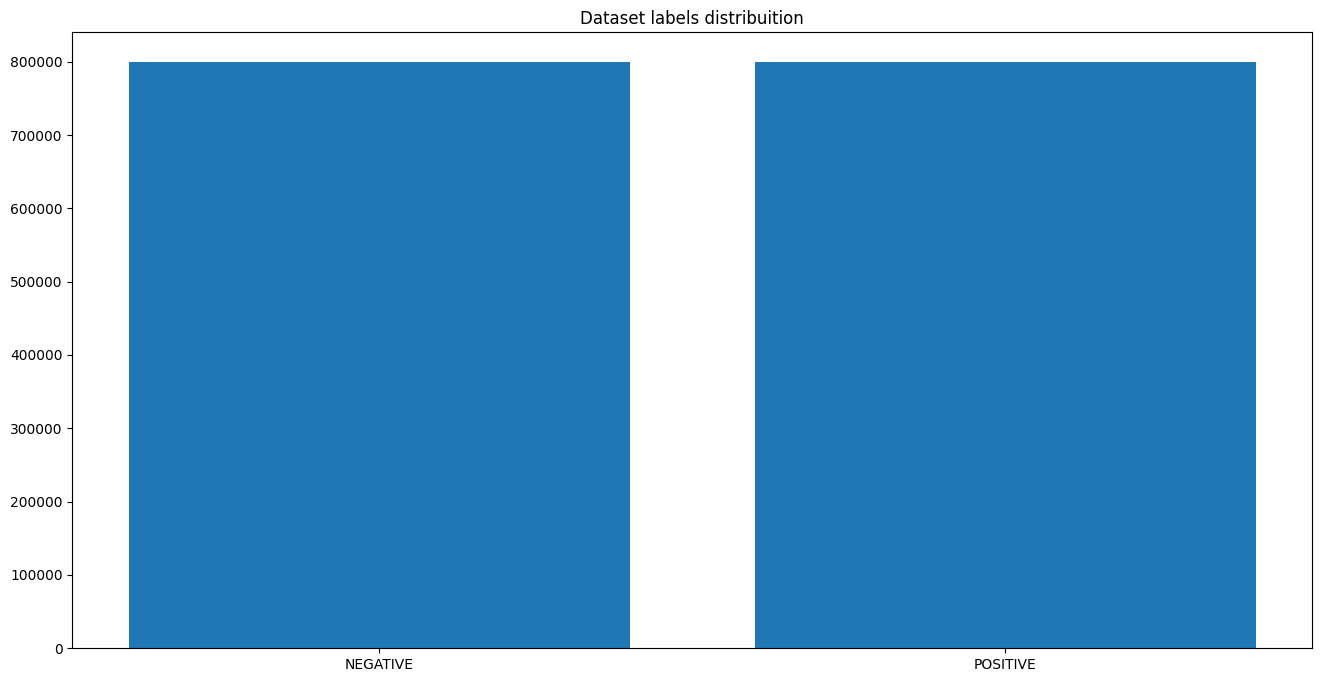

In [9]:
target_cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

## Preprocessing
---

In [10]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def clean_text(text):
    # Q. Emoji Handling
    return re.sub(TEXT_CLEANING_RE_ALL, ' ', str(text).lower()).strip()

def preprocess(text, stem=False):
    text = clean_text(text)
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [11]:
%%time
df.text = df.text.apply(lambda x: preprocess(x))

CPU times: user 20.2 s, sys: 218 ms, total: 20.5 s
Wall time: 20.6 s


## Visualization
---

In [26]:
SAMPLE_SIZE = 10000
WORD_SIZE = 200

df_group = df.groupby(df.target)
df_negative = df_group.get_group('NEGATIVE').reset_index(drop=True)
df_positive = df_group.get_group('POSITIVE').reset_index(drop=True)

def show_wordcloud_with_sampling(df: pd.DataFrame, max_words:int=WORD_SIZE, sample_size:int=SAMPLE_SIZE):
    df_sample = df.sample(n=sample_size)
    texts = df_sample.text
    plt.figure(figsize = (10,10))
    wc = WordCloud(max_words = max_words , width = 1600 , height = 800, scale=1,
                collocations=True).generate(" ".join(texts))
    plt.imshow(wc)

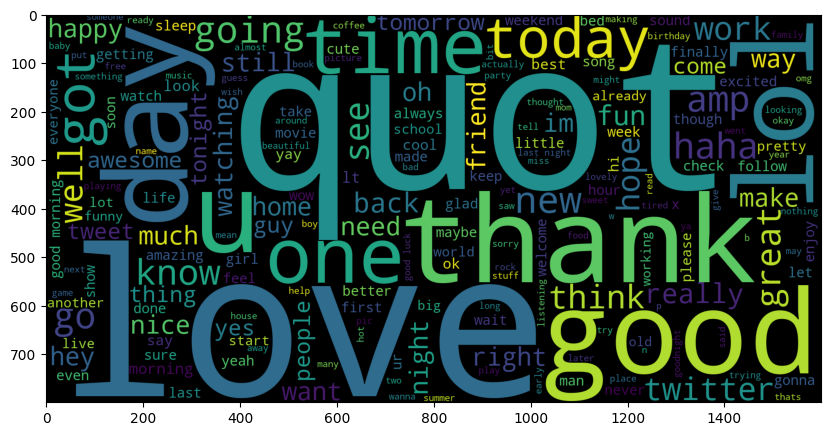

In [27]:
show_wordcloud_with_sampling(df_positive)

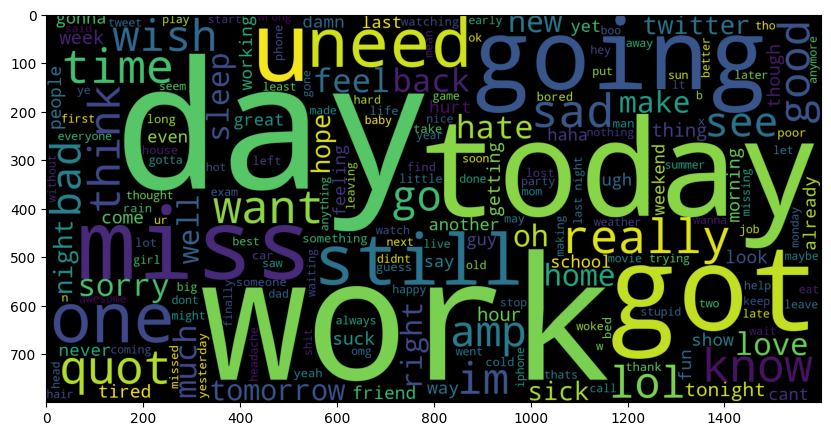

In [28]:
show_wordcloud_with_sampling(df_negative)